# Latent Dirichlet Allocation (LDA)

In [1]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaMulticore
from gensim.models import TfidfModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [27]:
# Load Tokenized and preprocessed words
df = pd.read_pickle('tokenized_tweets_lemmatzation.pkl')
print(df.head())

                                                text
0                                         [american]
1           [guy, resigned, yet, liberal, hypocrisy]
2  [woman, talking, crap, entire, time, finally, ...
3        [please, speak, sexual, assault, interview]
4  [cant, keep, turning, blind, eye, pretend, isn...


In [28]:
# I am using gensim library and LDA needs a dictionary of all words and a corpus

dictionary = corpora.Dictionary(df['text']) # mapping IDs to words
bow_corpus = [dictionary.doc2bow(text) for text in df['text']] # collection of documents represented in a numerical format - Bag of words

# I want to use TF-IDF as an alternative and see whether it outputs different topics 
tfidf_model = TfidfModel(bow_corpus) # initiating the model
tfidf_corpus = tfidf_model[bow_corpus] # creating a Term Frequence - Inverse Document Frequency


### Training the model

In [35]:
# LDA requires a preset k of Topics and training phases
num_topics = 10
passes = 10 
chunksize = 100  # how many documents are processed at a time -> carefull with memory!
workers = 4  # CPU cores for parallel computing

#### Using TF-IDF

In [36]:
# Create LDA model using  TF-IDF corpus
lda_model_tfidf = LdaMulticore(tfidf_corpus, num_topics=num_topics, id2word=dictionary, passes=passes, chunksize=chunksize, workers=workers)

#Print Topics suggested by LDA model
for index, topic in lda_model_tfidf.print_topics(-1):
    print(f"Topic {index}: {topic}")

Topic 0: 0.013*"trump" + 0.012*"far" + 0.010*"knew" + 0.009*"woman" + 0.008*"give" + 0.007*"believe" + 0.007*"movement" + 0.006*"resign" + 0.006*"resist" + 0.006*"youre"
Topic 1: 0.026*"christmas" + 0.011*"merry" + 0.009*"woman" + 0.008*"eve" + 0.008*"right" + 0.007*"hashtag" + 0.007*"rape" + 0.007*"movement" + 0.007*"like" + 0.007*"feminism"
Topic 2: 0.011*"black" + 0.010*"movement" + 0.010*"woman" + 0.010*"weinstein" + 0.009*"male" + 0.008*"men" + 0.008*"harvey" + 0.007*"nfl" + 0.007*"guess" + 0.007*"life"
Topic 3: 0.017*"business" + 0.016*"video" + 0.015*"microsoft" + 0.014*"japan" + 0.013*"opinion" + 0.010*"thread" + 0.010*"hollywood" + 0.010*"harassment" + 0.010*"blue" + 0.010*"top"
Topic 4: 0.020*"damon" + 0.020*"matt" + 0.014*"movement" + 0.010*"great" + 0.009*"burke" + 0.009*"case" + 0.009*"tarana" + 0.009*"year" + 0.009*"ever" + 0.008*"baby"
Topic 5: 0.013*"bill" + 0.013*"tax" + 0.012*"maga" + 0.011*"girl" + 0.008*"sexual" + 0.008*"please" + 0.008*"happy" + 0.007*"woman" + 0.0

## WORDCLOUD

In [ ]:

import matplotlib.pyplot as plt

# Generate word clouds for each topic
for i, topic in lda_model_tfidf.show_topics(formatted=False, num_words=10):
    words = dict(topic)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    
    # Plot the wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {i}')
    plt.axis('off')
    plt.show()

## COHERENCE SCORE

In [37]:
from gensim.models import CoherenceModel

tokenized_texts = df['text'].tolist()

coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()

print(f"Coherence Score TF-IDF: {coherence_score}")
# Coherence Score TF-IDF: 0.322277672481177 -> lemmatizaion no n grams

Coherence Score TF-IDF: 0.2840447393064628


# import gensim
from gensim.models.ldamulticore import LdaMulticore
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np


# Construct a sparse matrix from the LDA output
topic_matrix_sparse = []
for doc in tfidf_corpus:
    doc_topics = lda_model_tfidf.get_document_topics(doc)
    topic_distribution = np.zeros(lda_model_tfidf.num_topics)
    for topic_id, prob in doc_topics:
        topic_distribution[topic_id] = prob
    topic_matrix_sparse.append(topic_distribution)
topic_matrix_sparse = np.array(topic_matrix_sparse)

# Apply PCA to reduce dimensionality before t-SNE
pca = PCA(n_components=3, random_state=42)
pca_result = pca.fit_transform(topic_matrix_sparse)

# Apply t-SNE to the PCA-reduced data
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_result)

# Visualize the t-SNE result
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='blue', marker='o')
plt.title('t-SNE visualization of topic distributions')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

In [23]:
# Save TF_IDF output into a txt file

output_file = f'model_outputs\\LDA_TF-IDF_topics_STEMMER_{num_topics}_{passes}.txt'

with open(output_file, 'w') as f: # Open File in write modus
    for index, topic in lda_model_tfidf.print_topics(-1):
        f.write(f"Topic {index}: {topic}\n") # Print output into file

print("Topics have been saved!")

Topics have been saved!


#### Using Bag of Words -> BOW

In [20]:
# Create LDA model using  BOW corpus
lda_model_bow = LdaMulticore(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=passes, chunksize=chunksize, workers=workers)

#Print Topics suggested by LDA model
for index, topic in lda_model_bow.print_topics(-1):
    print(f"Topic {index}: {topic}")

Topic 0: 0.043*"like" + 0.025*"dont" + 0.019*"movement" + 0.017*"look" + 0.017*"way" + 0.016*"want" + 0.015*"know" + 0.013*"feel" + 0.013*"read" + 0.012*"girl"
Topic 1: 0.026*"resist" + 0.022*"trump" + 0.018*"power" + 0.016*"tax" + 0.015*"great" + 0.015*"hashtag" + 0.015*"women" + 0.012*"must" + 0.010*"sex" + 0.010*"new"
Topic 2: 0.084*"latest" + 0.057*"thank" + 0.049*"daili" + 0.042*"moment" + 0.023*"weinstein" + 0.017*"stand" + 0.015*"harvey" + 0.011*"could" + 0.011*"busi" + 0.010*"attack"
Topic 3: 0.050*"trump" + 0.022*"post" + 0.021*"tweet" + 0.021*"news" + 0.016*"ask" + 0.015*"fuck" + 0.014*"ever" + 0.014*"justic" + 0.014*"mean" + 0.012*"accus"
Topic 4: 0.029*"movement" + 0.029*"women" + 0.020*"call" + 0.019*"silenc" + 0.015*"cultur" + 0.015*"resign" + 0.012*"video" + 0.012*"rape" + 0.011*"chang" + 0.011*"violenc"
Topic 5: 0.046*"women" + 0.033*"movement" + 0.023*"black" + 0.016*"live" + 0.014*"matter" + 0.014*"white" + 0.013*"maga" + 0.013*"burk" + 0.012*"tarana" + 0.011*"backlas

### SAVE MODEL

In [6]:
# Save Model
lda_model_bow.save(f'lda_model_bow_{num_topics}_{passes}.model')

### LOAD MODEL

In [9]:
from gensim.models import LdaModel
lda_model_bow = LdaModel.load(f'lda_model_bow_{num_topics}_{passes}.model')

# Verify by printing the topics
for index, topic in lda_model_bow_loaded.print_topics(-1):
    print(f"Topic {index}: {topic}")

Topic 0: 0.024*"moment" + 0.022*"come" + 0.014*"trump" + 0.012*"news" + 0.011*"movement" + 0.011*"via" + 0.009*"thought" + 0.008*"knew" + 0.008*"next" + 0.008*"today"
Topic 1: 0.027*"movement" + 0.018*"women" + 0.012*"want" + 0.012*"men" + 0.010*"talk" + 0.009*"amp" + 0.009*"matt_damon" + 0.008*"stori" + 0.008*"christma" + 0.007*"like"
Topic 2: 0.035*"time" + 0.034*"year" + 0.030*"movement" + 0.011*"new" + 0.009*"person" + 0.008*"that" + 0.007*"via" + 0.006*"trump" + 0.006*"chang" + 0.006*"merri_christma"
Topic 3: 0.038*"women" + 0.022*"movement" + 0.015*"men" + 0.013*"say" + 0.012*"like" + 0.011*"dont" + 0.010*"need" + 0.009*"victim" + 0.009*"get" + 0.009*"stori"
Topic 4: 0.073*"sexual" + 0.045*"harass" + 0.040*"latest" + 0.024*"daili" + 0.020*"assault" + 0.018*"thank" + 0.016*"trump" + 0.013*"resist" + 0.012*"abus" + 0.012*"accus"


### DRAW WORDCLOU

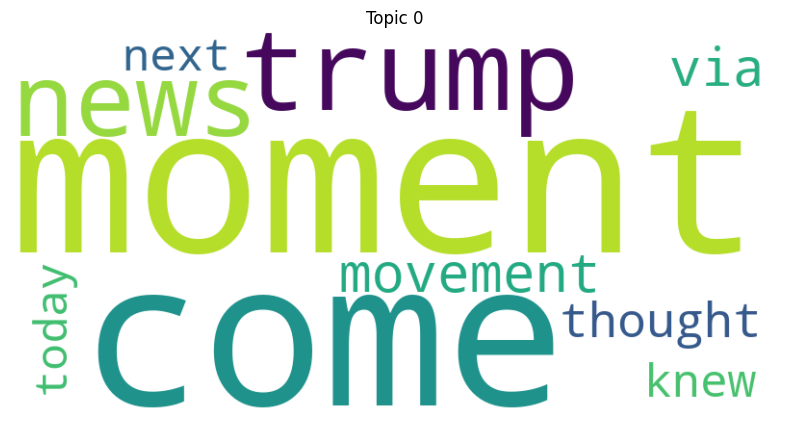

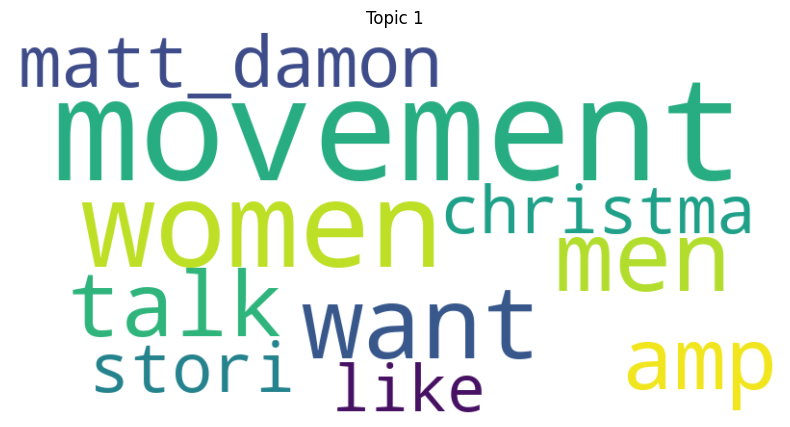

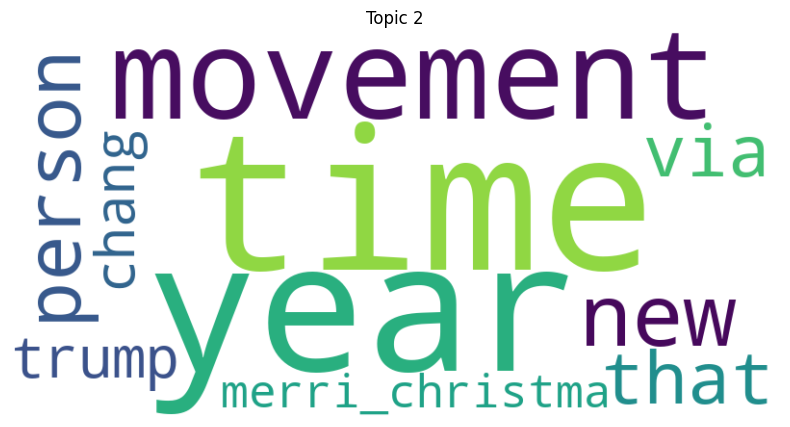

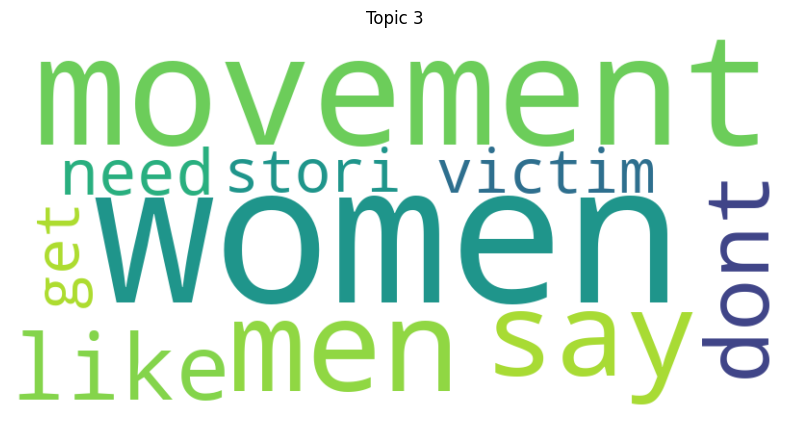

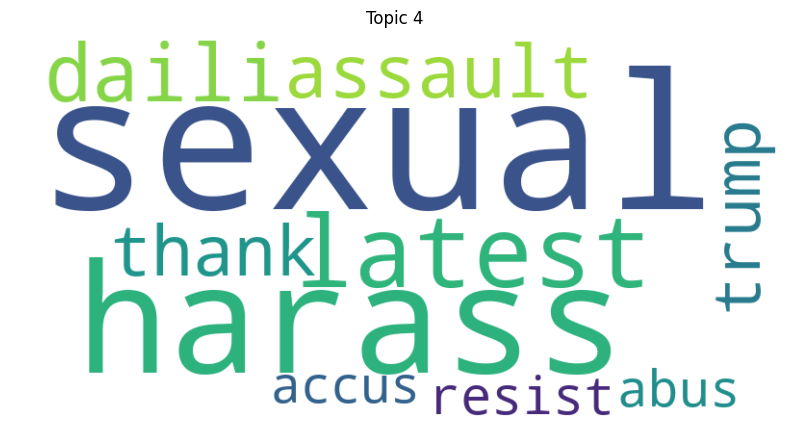

In [14]:
# Generate word clouds for each topic
for i, topic in lda_model_bow.show_topics(formatted=False, num_words=10):
    words = dict(topic)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    
    # Plot the wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {i}')
    plt.axis('off')
    plt.show()

## COHERENCE SCORES


In [21]:
from gensim.models import CoherenceModel

tokenized_texts = df['text'].tolist()

coherence_model_lda = CoherenceModel(model=lda_model_bow, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()

print(f"Coherence Score: {coherence_score}")
# Coherence Score: 0.2746461958309994 -> lemmatization no n grams

Coherence Score: 0.26185939330509994


In [44]:
# Save BOW output into a txt file

output_file = f'model_outputs\\LDA_BOW_topics_STEMMER_{num_topics}_{passes}.txt'

with open(output_file, 'w') as f: # Open File in write modus
    for index, topic in lda_model_bow.print_topics(-1):
        f.write(f"Topic {index}: {topic}\n") # Print output into file

print("Topics have been saved!")

Topics have been saved!
